In [1]:
!pip install PyMuPDF

DEPRECATION: Loading egg at c:\users\arpan\anaconda3\envs\text_analytics\lib\site-packages\huggingface_hub-0.29.1-py3.8.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [2]:
import fitz  # PyMuPDF

# Load PDF and extract text
pdf_path = r"C:\Users\arpan\Downloads\AI coursework\dataCleaneddoc.pdf"  # Change this to your actual file path

def extract_text_from_pdf(pdf_path):
    text = ""
    doc = fitz.open(pdf_path)
    for page in doc:
        text += page.get_text("text") + "\n"  # Extract text from each page
    return text

pdf_text = extract_text_from_pdf(pdf_path)
print(pdf_text[:100])  # Print first 1000 characters to check extraction


If you want to see a fairy,
In the middle of the night,
Wrap the blanket round you,
And shut your ey


In [3]:
import nltk
import re
from collections import defaultdict
nltk.download('punkt')

# Tokenize into sentences
sentences = nltk.sent_tokenize(pdf_text)

# Tokenize into words
words = re.findall(r'\b\w+\b', pdf_text.lower())  # Extract words ignoring punctuation


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# Example word list (change this based on your needs)
word_list = ["children","ideas","successful","school","hearing","forward",
"little","people","world","garden","looks",
"early","walking","fairies","summer",
"clouds","sky","energy","fuel","substances","elements",
"molecule","water","discovery","shadow","mystery",
"development","materials","space","empty","radioactive",

"extremely","signal","time","supply","controlled",

"run","locomotive","tank","engines","equipment",

"story","famous","work","aircraft","structure","machines","progress",

"human","stories","flying","large","experiments","failures",

"elastic","progress","dismal","aerodrome",

"young","capable","succeeded","air","control","wing",

"ignored","first","mastered","thrust","thrilled",

"plane","technique","gunfire","pilots","weapon",

"production","thinking","fought","believed","boats",

"satisfied","heavy","factory","endurance","dream",

"gyro","clippers","naval","enemies","captain"]

# Initialize co-occurrence dictionary
co_occurrence = defaultdict(lambda: defaultdict(int))

# Count co-occurrences in sentences
for sentence in sentences:
    sentence_words = set(nltk.word_tokenize(sentence))  # Unique words in the sentence
    for word1 in word_list:
        for word2 in word_list:
            if word1 in sentence_words and word2 in sentence_words and word1 != word2:
                co_occurrence[word1][word2] += 1

# Print co-occurrence matrix
for word1 in word_list:
    print(f"{word1}: {dict(co_occurrence[word1])}")


children: {'school': 1, 'energy': 1, 'flying': 1, 'air': 1}
ideas: {'time': 1, 'work': 2, 'naval': 2, 'enemies': 1}
successful: {'first': 9, 'time': 3, 'air': 2, 'little': 1, 'naval': 1, 'early': 1, 'flying': 2, 'boats': 1, 'world': 1, 'aircraft': 2, 'experiments': 1, 'famous': 1, 'pilots': 1, 'plane': 1}
school: {'children': 1}
hearing: {}
forward: {'thrust': 1, 'plane': 1, 'controlled': 1, 'air': 2}
little: {'flying': 2, 'fairies': 1, 'summer': 1, 'energy': 2, 'water': 1, 'young': 1, 'air': 2, 'dream': 1, 'control': 1, 'first': 1, 'successful': 1, 'work': 1, 'early': 1, 'time': 2, 'engines': 1}
people: {'world': 4, 'early': 1, 'fuel': 1, 'mystery': 1, 'plane': 2, 'stories': 1, 'flying': 1, 'fought': 1, 'weapon': 1, 'heavy': 1, 'development': 1, 'young': 1}
world: {'people': 4, 'heavy': 3, 'energy': 1, 'large': 1, 'fuel': 2, 'supply': 1, 'first': 10, 'work': 1, 'flying': 10, 'progress': 2, 'experiments': 2, 'air': 6, 'plane': 2, 'time': 4, 'engines': 1, 'aircraft': 3, 'production': 1,

In [5]:
from itertools import combinations
import numpy as np

# Find positions of each word
word_positions = {word: [i for i, w in enumerate(words) if w == word] for word in word_list}

# Compute average distance between word pairs
distance_matrix = {}

for word1, word2 in combinations(word_list, 2):
    distances = [abs(pos1 - pos2) for pos1 in word_positions[word1] for pos2 in word_positions[word2]]
    avg_distance = np.mean(distances) if distances else float('inf')  # Use 'inf' if words never co-occur
    distance_matrix[(word1, word2)] = avg_distance

# Print results
for pair, dist in distance_matrix.items():
    print(f"Distance between {pair[0]} and {pair[1]}: {dist}")


Distance between children and ideas: 21137.02
Distance between children and successful: 19409.28181818182
Distance between children and school: 23374.8
Distance between children and hearing: 21901.6
Distance between children and forward: 23680.314285714285
Distance between children and little: 8432.353191489361
Distance between children and people: 13689.469230769231
Distance between children and world: 21903.925396825398
Distance between children and garden: 3904.4
Distance between children and looks: 4404.175
Distance between children and early: 20423.005714285715
Distance between children and walking: 38534.6
Distance between children and fairies: 3364.6
Distance between children and summer: 12005.142857142857
Distance between children and clouds: 3290.8
Distance between children and sky: 4100.08
Distance between children and energy: 6307.830769230769
Distance between children and fuel: 6111.864
Distance between children and substances: 4013.85
Distance between children and elements

In [6]:
import pandas as pd

# Create a sorted list of words
sorted_words = sorted(word_list)

# Initialize an empty matrix
similarity_matrix = pd.DataFrame(0, index=sorted_words, columns=sorted_words)

# Fill in the matrix with co-occurrence values
for word1 in sorted_words:
    for word2 in sorted_words:
        if word1 != word2:
            similarity_matrix.loc[word1, word2] = co_occurrence[word1][word2]

# Convert dictionary-based distance matrix into a DataFrame
distance_df = pd.DataFrame(float('inf'), index=sorted_words, columns=sorted_words)

for (word1, word2), distance in distance_matrix.items():
    distance_df.loc[word1, word2] = distance
    distance_df.loc[word2, word1] = distance  # Symmetric

# Convert distance to similarity (higher co-occurrence → more similarity)
max_co_occurrence = similarity_matrix.to_numpy().max()
max_distance = distance_df.replace(float('inf'), 0).to_numpy().max()

if max_co_occurrence > 0:
    similarity_matrix = similarity_matrix / max_co_occurrence  # Normalize between 0-1

if max_distance > 0:
    distance_df = 1 - (distance_df / max_distance)  # Invert distance to similarity

# Save both matrices to CSV
similarity_matrix.to_csv("word_cooccurrence_similarity.csv")
distance_df.to_csv("word_distance_similarity.csv")

print("Similarity matrices saved successfully!")


Similarity matrices saved successfully!


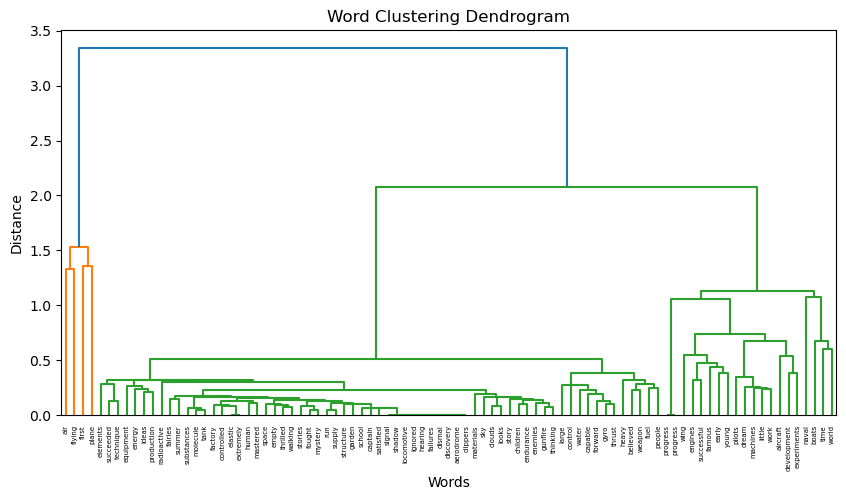

In [7]:
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Convert similarity to distance (for hierarchical clustering)
distance_matrix = 1 - similarity_matrix  # Invert similarity to distance

# Convert to condensed form for clustering
#condensed_distances = squareform(distance_matrix)

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=sorted_words, leaf_rotation=90)
plt.title("Word Clustering Dendrogram")
plt.xlabel("Words")
plt.ylabel("Distance")
plt.show()


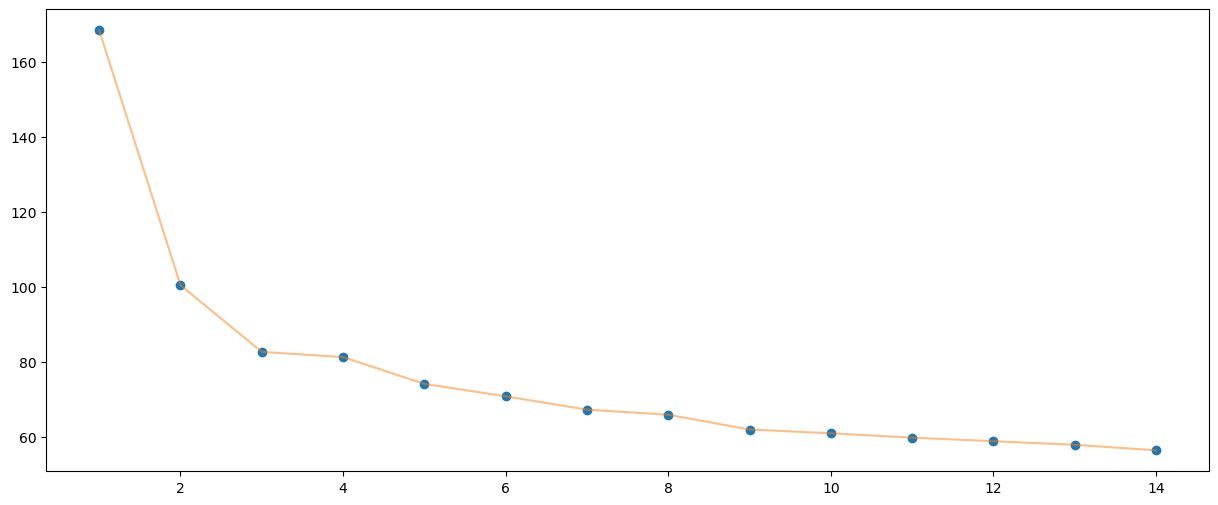

In [8]:
from sklearn.cluster import KMeans

# Define the number of clusters (choose based on data)
num_clusters = 5
distance_df1 = distance_df.replace(float('-inf'), 0)

# Apply K-Means clustering
inertia=[]
for n in range (1,15):
    gghmeans = KMeans(n_clusters=n, random_state=42)
    gghmeans.fit_predict(distance_df1)
    inertia.append(gghmeans.inertia_)

plt.figure(1, figsize=(15,6))
plt.plot(np.arange(1,15),inertia,'o')
plt.plot(np.arange(1,15),inertia,'-', alpha=0.5)
plt.show()

In [9]:
# Define the number of clusters (choose based on data)
num_clusters = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(distance_df1)

# Assign words to clusters
word_clusters = pd.DataFrame({"Word": sorted_words, "Cluster": labels})
word_clusters.to_csv("word_clusters.csv", index=False)

print("Word clusters saved successfully!")

Word clusters saved successfully!


In [10]:
print(max_co_occurrence)
print(max_distance)
print(distance_df1.head())
similarity_matrix.head()

20
42439.0
           aerodrome       air  aircraft  believed     boats   capable  \
aerodrome   0.000000  0.688505  0.713158  0.763688  0.723828  0.696095   
air         0.688505  0.000000  0.776417  0.658974  0.758208  0.744873   
aircraft    0.713158  0.776417  0.000000  0.677273  0.797850  0.774178   
believed    0.763688  0.658974  0.677273  0.000000  0.688843  0.667345   
boats       0.723828  0.758208  0.797850  0.688843  0.000000  0.761807   

            captain  children  clippers    clouds  ...  thrilled    thrust  \
aerodrome  0.780245  0.682072  0.696206  0.620868  ...  0.875306  0.893307   
air        0.745451  0.412269  0.821503  0.352320  ...  0.713323  0.674904   
aircraft   0.780886  0.414125  0.854937  0.352183  ...  0.750550  0.697403   
believed   0.717573  0.618253  0.676665  0.571145  ...  0.763776  0.771944   
boats      0.784337  0.461907  0.834446  0.405810  ...  0.768276  0.717118   

               time   walking     water    weapon      wing      work  \
ae

,aerodrome,air,aircraft,believed,boats,capable,captain,children,clippers,clouds,...,thrilled,thrust,time,walking,water,weapon,wing,work,world,young
aerodrome,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
air,0.0,0.00,0.05,0.0,0.0,0.05,0.0,0.05,0.0,0.05,...,0.0,0.05,0.10,0.0,0.05,0.00,0.45,0.00,0.30,0.25
aircraft,0.0,0.05,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.00,0.05,0.0,0.00,0.10,0.00,0.05,0.15,0.00
believed,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.00,0.00,0.0,0.00,0.05,0.00,0.00,0.00,0.00
boats,0.0,0.00,0.00,0.0,0.0,0.05,0.0,0.00,0.0,0.00,...,0.0,0.00,0.15,0.0,0.00,0.00,0.00,0.00,0.05,0.00


In [11]:
from collections import defaultdict

# Define window size
window_size = 5  

# Initialize co-occurrence dictionary
window_co_occurrence = defaultdict(lambda: defaultdict(int))

# Iterate over words with a moving window
for i in range(len(words) - window_size):
    window_words = words[i : i + window_size]  # Extract words in the window
    for word1 in word_list:
        for word2 in word_list:
            if word1 in window_words and word2 in window_words and word1 != word2:
                window_co_occurrence[word1][word2] += 1

# Convert to DataFrame
import pandas as pd
co_occurrence_df = pd.DataFrame(window_co_occurrence).fillna(0)

# Save to CSV
co_occurrence_df.to_csv("window_based_cooccurrence.csv")

print("Window-based co-occurrence matrix saved!")


Window-based co-occurrence matrix saved!


In [27]:
import networkx as nx
import pandas as pd

# Load the similarity matrix
#similarity_matrix = pd.read_csv("word_cooccurrence_similarity.csv", index_col=0)

# Convert similarity to distance (Dijkstra needs a "cost" to minimize)
distance_matrix = 1 / (distance_df1 + 1e-5)  # Add small value to avoid division by zero

# Create a graph using NetworkX
G = nx.Graph()

# Add edges from the similarity matrix
for word1 in distance_matrix.index:
    for word2 in distance_matrix.columns:
        if word1 != word2 and (distance_matrix.loc[word1, word2] != float(0)).any():
            G.add_edge(word1, word2, weight=distance_matrix.loc[word1, word2])

# Function to find shortest path
def find_shortest_path(G, start_word, end_word):  # Added G as an argument
    if not G.has_node(start_word):
        print(f"Error: Start word '{start_word}' not in graph.")
        return None, float('inf')
    if not G.has_node(end_word):
        print(f"Error: End word '{end_word}' not in graph.")
        return None, float('inf')
    
    try:
        path = nx.shortest_path(G, source=start_word, target=end_word, weight="weight")
        path_length = nx.shortest_path_length(G, source=start_word, target=end_word, weight="weight")
        return path, path_length
    except nx.NetworkXNoPath:
        return None, float("inf")

if isinstance(word1, pd.Series):
    word1 = word1.item()
if isinstance(word2, pd.Series):
    word2 = word2.item()

# Example: Compare shortest paths
word1 = "enemies"  # Replace with your chosen word enemies and captain
word2 = "captain"

shortest_path, path_length = find_shortest_path(G, word1, word2)  # Pass G

print(f"Shortest path between '{word1}' and '{word2}': {shortest_path}")
print(f"Path distance: {path_length}")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [40]:
import networkx as nx
import pandas as pd
import gzip

# Load the similarity matrix
#similarity_matrix = pd.read_csv("word_cooccurrence_similarity.csv", index_col=0)

# Convert similarity to distance (Dijkstra needs a "cost" to minimize)
distance_matrix = 1 / (distance_df1 + 1e-5)  # Add small value to avoid division by zero

# Create a graph using NetworkX
#G = nx.Graph()
G = nx.path_graph(5)

# Add edges from the similarity matrix
for word1 in distance_matrix.index:
    for word2 in distance_matrix.columns:
        if word1 != word2 and (distance_matrix.loc[word1, word2] != float(0)).any():
            G.add_edge(word1, word2, weight=distance_matrix.loc[word1, word2])

# Function to find shortest path
def find_shortest_path(start_word, end_word):
    path = nx.shortest_path(G, source=start_word, target=end_word, weight="weight").item()
    path_length = nx.shortest_path_length(G, source=start_word, target=end_word, weight="weight")
    return path, path_length

# Example: Compare shortest paths
word1 = "enemies"  # Replace with your chosen word enemies and captain
word2 = "captain"

shortest_path = find_shortest_path(word1, word2)

print(f"Shortest path between '{word1}' and '{word2}': {shortest_path}")
print(f"Path distance: {path_length}")


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().